In [64]:
import pandas as pd
import requests
import seaborn as sns
import numpy as np


In [65]:
df = pd.read_csv('SpotifyFeatures.csv')

In [66]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [67]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

[Text(0.5, 1.0, 'Most Popular Genres')]

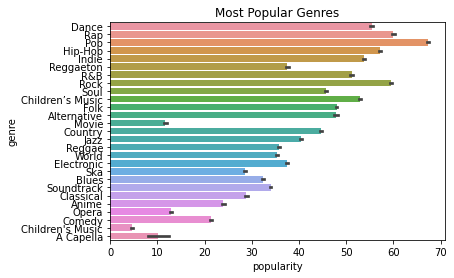

In [73]:
#Most popular genres



df1 = df.sort_values('genre', ascending = False)
df1.drop_duplicates(subset=["genre"],inplace=False)
df1 = df.sort_values('popularity', ascending = False)
df1.drop_duplicates(subset="track_name",inplace=True)



sns.barplot(data = df1, y = 'genre', x = 'popularity').set(title = "Most Popular Genres")

[Text(0.5, 1.0, 'Key Signature Vs Popularity')]

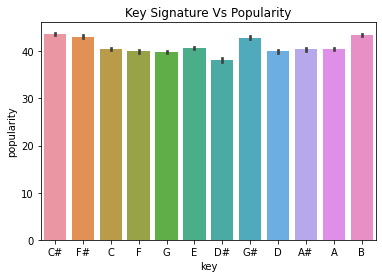

In [86]:
#Length of track vs popularity

sns.barplot(data = df, y = 'popularity', x = 'key').set(title = "Key Signature Vs Popularity")

[Text(0.5, 1.0, 'Track Length Vs Popularity')]

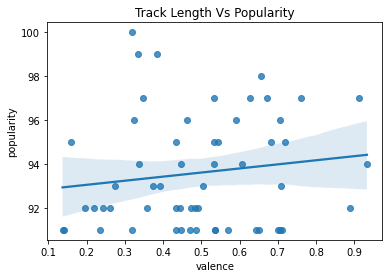

In [92]:
#Valence vs popularity

valence = df.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
valence.drop_duplicates(subset="track_name",inplace=True)

valence[:10]

sns.regplot(data = valence, y = 'popularity', x = 'valence').set(title = "Track Length Vs Popularity")

[Text(0.5, 1.0, 'Track Length Vs Popularity')]

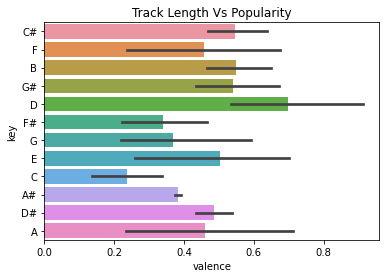

In [94]:
sns.barplot(data = valence, y = 'key', x = 'valence').set(title = "Track Length Vs Popularity")

In [95]:
valence.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.023697,0.194763,-0.041494,-0.087582,-0.146413,-0.262020,-0.073705,0.056721,-0.120148,0.140921
acousticness,-0.023697,1.000000,-0.280445,-0.282720,-0.416163,-0.096692,-0.177281,-0.174952,-0.055817,-0.304020,0.019314
danceability,0.194763,-0.280445,1.000000,0.017231,-0.062034,0.164850,-0.112021,-0.115452,0.129173,0.011471,0.325501
duration_ms,-0.041494,-0.282720,0.017231,1.000000,0.286540,0.249041,-0.010385,0.263702,-0.065352,0.282892,0.018877
energy,-0.087582,-0.416163,-0.062034,0.286540,1.000000,-0.027800,0.021386,0.760066,-0.137649,0.067755,0.369674
instrumentalness,-0.146413,-0.096692,0.164850,0.249041,-0.027800,1.000000,-0.083316,0.056914,-0.090121,0.096932,0.053265
liveness,-0.262020,-0.177281,-0.112021,-0.010385,0.021386,-0.083316,1.000000,-0.169579,0.056605,0.117705,-0.320284
loudness,-0.073705,-0.174952,-0.115452,0.263702,0.760066,0.056914,-0.169579,1.000000,-0.398843,0.086125,0.398091
speechiness,0.056721,-0.055817,0.129173,-0.065352,-0.137649,-0.090121,0.056605,-0.398843,1.000000,-0.137697,-0.157168
tempo,-0.120148,-0.304020,0.011471,0.282892,0.067755,0.096932,0.117705,0.086125,-0.137697,1.000000,-0.071086


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857
